# [LAB-08] 2. 워드 클라우드 (한글)

## #01. 형태소 분석의 이해

### 1. 형태소
- 의미가 있는 최소 단위 (minimally meaningful unit)를 뜻하는 말
- 문법적으로 더 이상 나눌 수 없는 언어 요소
- 영어에 비해 한글은 복잡한 처리 과정 거쳐야 해서 별도의 라이브러리 적용 필요 (konlpy, mecab 등)

###  4. 형태소 분석 테스트

#### (1) 패키지 참조

In [4]:
from IPython.display import Image
from wordcloud import WordCloud

# 한글 형태소 분석기
from konlpy.tag import Okt

# 패키지의 데이터 관련 정보 찾는 객체 (설치 위치 파악용)
from konlpy import data

# 파이썬 내장 클래스 (설치 불 필요)
from collections import Counter
import os

#### (2) 형태소 분석 객체 생성

In [5]:
nlp = Okt()

#### (3) 샘플 문장에 대한 형태소 분석 수행

In [6]:
sample = """개봉했을 때 부터 지금 까지 마음이 답답하거나 힘들 때
이 영화 보고 있어요 그때마다 심적인 위로를 받을 수 있는 영화같아요
장면 하나하나가 너무 예쁘고 마음에 남아서 진한 여운까지 주는영화 감사합니다.
알잘딱깔센 얼죽아"""

# 명사들만 추출 -> 리스트 형식으로 변환
nouns = nlp.nouns(sample)
print(nouns)

['개봉', '때', '부터', '지금', '마음', '때', '이', '영화', '보고', '그때', '심', '위로', '수', '영화', '장면', '하나', '하나', '마음', '남아', '여운', '영화', '알잘딱깔센', '얼']


### 5. 사전 구축하기

#### (1) knolpy의 설치 경로 확인

In [7]:
for p in data.path:
    path = os.path.abspath(p)
    print(path, '->', os.path.exists(path))

C:\Users\itwill\konlpy_data -> False
C:\konlpy_data -> False
D:\konlpy_data -> False
E:\konlpy_data -> False
c:\Users\itwill\AppData\Local\Programs\Python\Python313\konlpy_data -> False
c:\Users\itwill\AppData\Local\Programs\Python\Python313\lib\konlpy_data -> False
C:\Users\itwill\AppData\Roaming\konlpy_data -> False
C:\Users\itwill\AppData\Local\Programs\Python\Python313\Lib\site-packages\konlpy\data -> True


## #03. 대한민국 헌법 형태소 분석

### 1. 분석할 데이터 가져오기:

In [8]:
with open('wordcloud/대한민국헌법.txt', 'r', encoding = 'utf-8') as f:
    text = f.read()
    #print(text)

### 2. 데이터에 대한 형태소 분석

In [9]:
# 형태소 분석 클래스 객체 생성:
nlp = Okt()

# 명사들만 추출 -> 리스트 형식으로 반환
nouns = nlp.nouns(text)
print(nouns)

['대한민국', '헌법', '시행', '헌법', '제', '호', '전부', '개정', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입', '각하', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '향상', '기하', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '함', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '것', '다짐', '제정', '차', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '제', '장', '강', '제', '대한민국', '민주공화국', '대한민국', '주권', '국민', '모든', '권력', '국민', '제', '대한민국', '국민', '요건', '법률', '정', '국가', '법률', '정', '바', '재외국민', '보호', '의무', '제', '대한민국', '영토', '한반도', '그', '부속', '도서', '제', '대한민국', '통일', '지향', '자유민주', '질서', '입각', '평화', '통일', '정책', '수립', '추진', '제', '대한민국', '국제', '평화', '유지', '노력', '침략', '전쟁', '부인', '국군', '국가', '안전보장', '국토', '방위', '의무', '수행', '함', '사명', '그', '정치', '중립성', '준수',

### 3. 불용어 제거하기

#### (1) 불용어 목록 불러오기:

In [11]:
with open('wordcloud/stopwords-ko.txt', 'r', encoding='utf-8') as f:
    stopwords = f.readlines()

    for i, v in enumerate(stopwords):
        stopwords[i] = v.strip()
    
    #print(stopwords)

#### (2) 추출된 명사에서 불용어 제거하기:

In [13]:
data_set = []

for v in nouns:
    if v not in stopwords:
        data_set.append(v)

#print(data_set)

#### (3) 리스트로부터 빈도수 측정하기:

In [14]:
count = Counter(data_set)
count

Counter({'법률': 127,
         '정': 89,
         '수': 88,
         '대통령': 83,
         '국가': 73,
         '국회': 68,
         '국민': 61,
         '관': 58,
         '헌법': 53,
         '모든': 37,
         '바': 37,
         '위': 36,
         '사항': 23,
         '권리': 21,
         '안': 21,
         '의원': 21,
         '자유': 20,
         '정부': 20,
         '선거': 20,
         '임명': 20,
         '직무': 19,
         '국무총리': 19,
         '경제': 18,
         '의무': 18,
         '조직': 18,
         '국회의원': 18,
         '임기': 18,
         '의결': 17,
         '공무원': 17,
         '경우': 17,
         '국무위원': 17,
         '대법원': 17,
         '범위': 16,
         '장': 15,
         '법관': 15,
         '보호': 14,
         '정책': 14,
         '정당': 14,
         '헌법재판소': 14,
         '재적': 14,
         '회의': 14,
         '항의': 14,
         '관리': 14,
         '노력': 13,
         '보장': 13,
         '거나': 13,
         '요구': 13,
         '법원': 12,
         '집회': 12,
         '과반수': 12,
         '출석': 12,
         '찬성': 12,
     

### 4. 단어 빈도수 시각화:

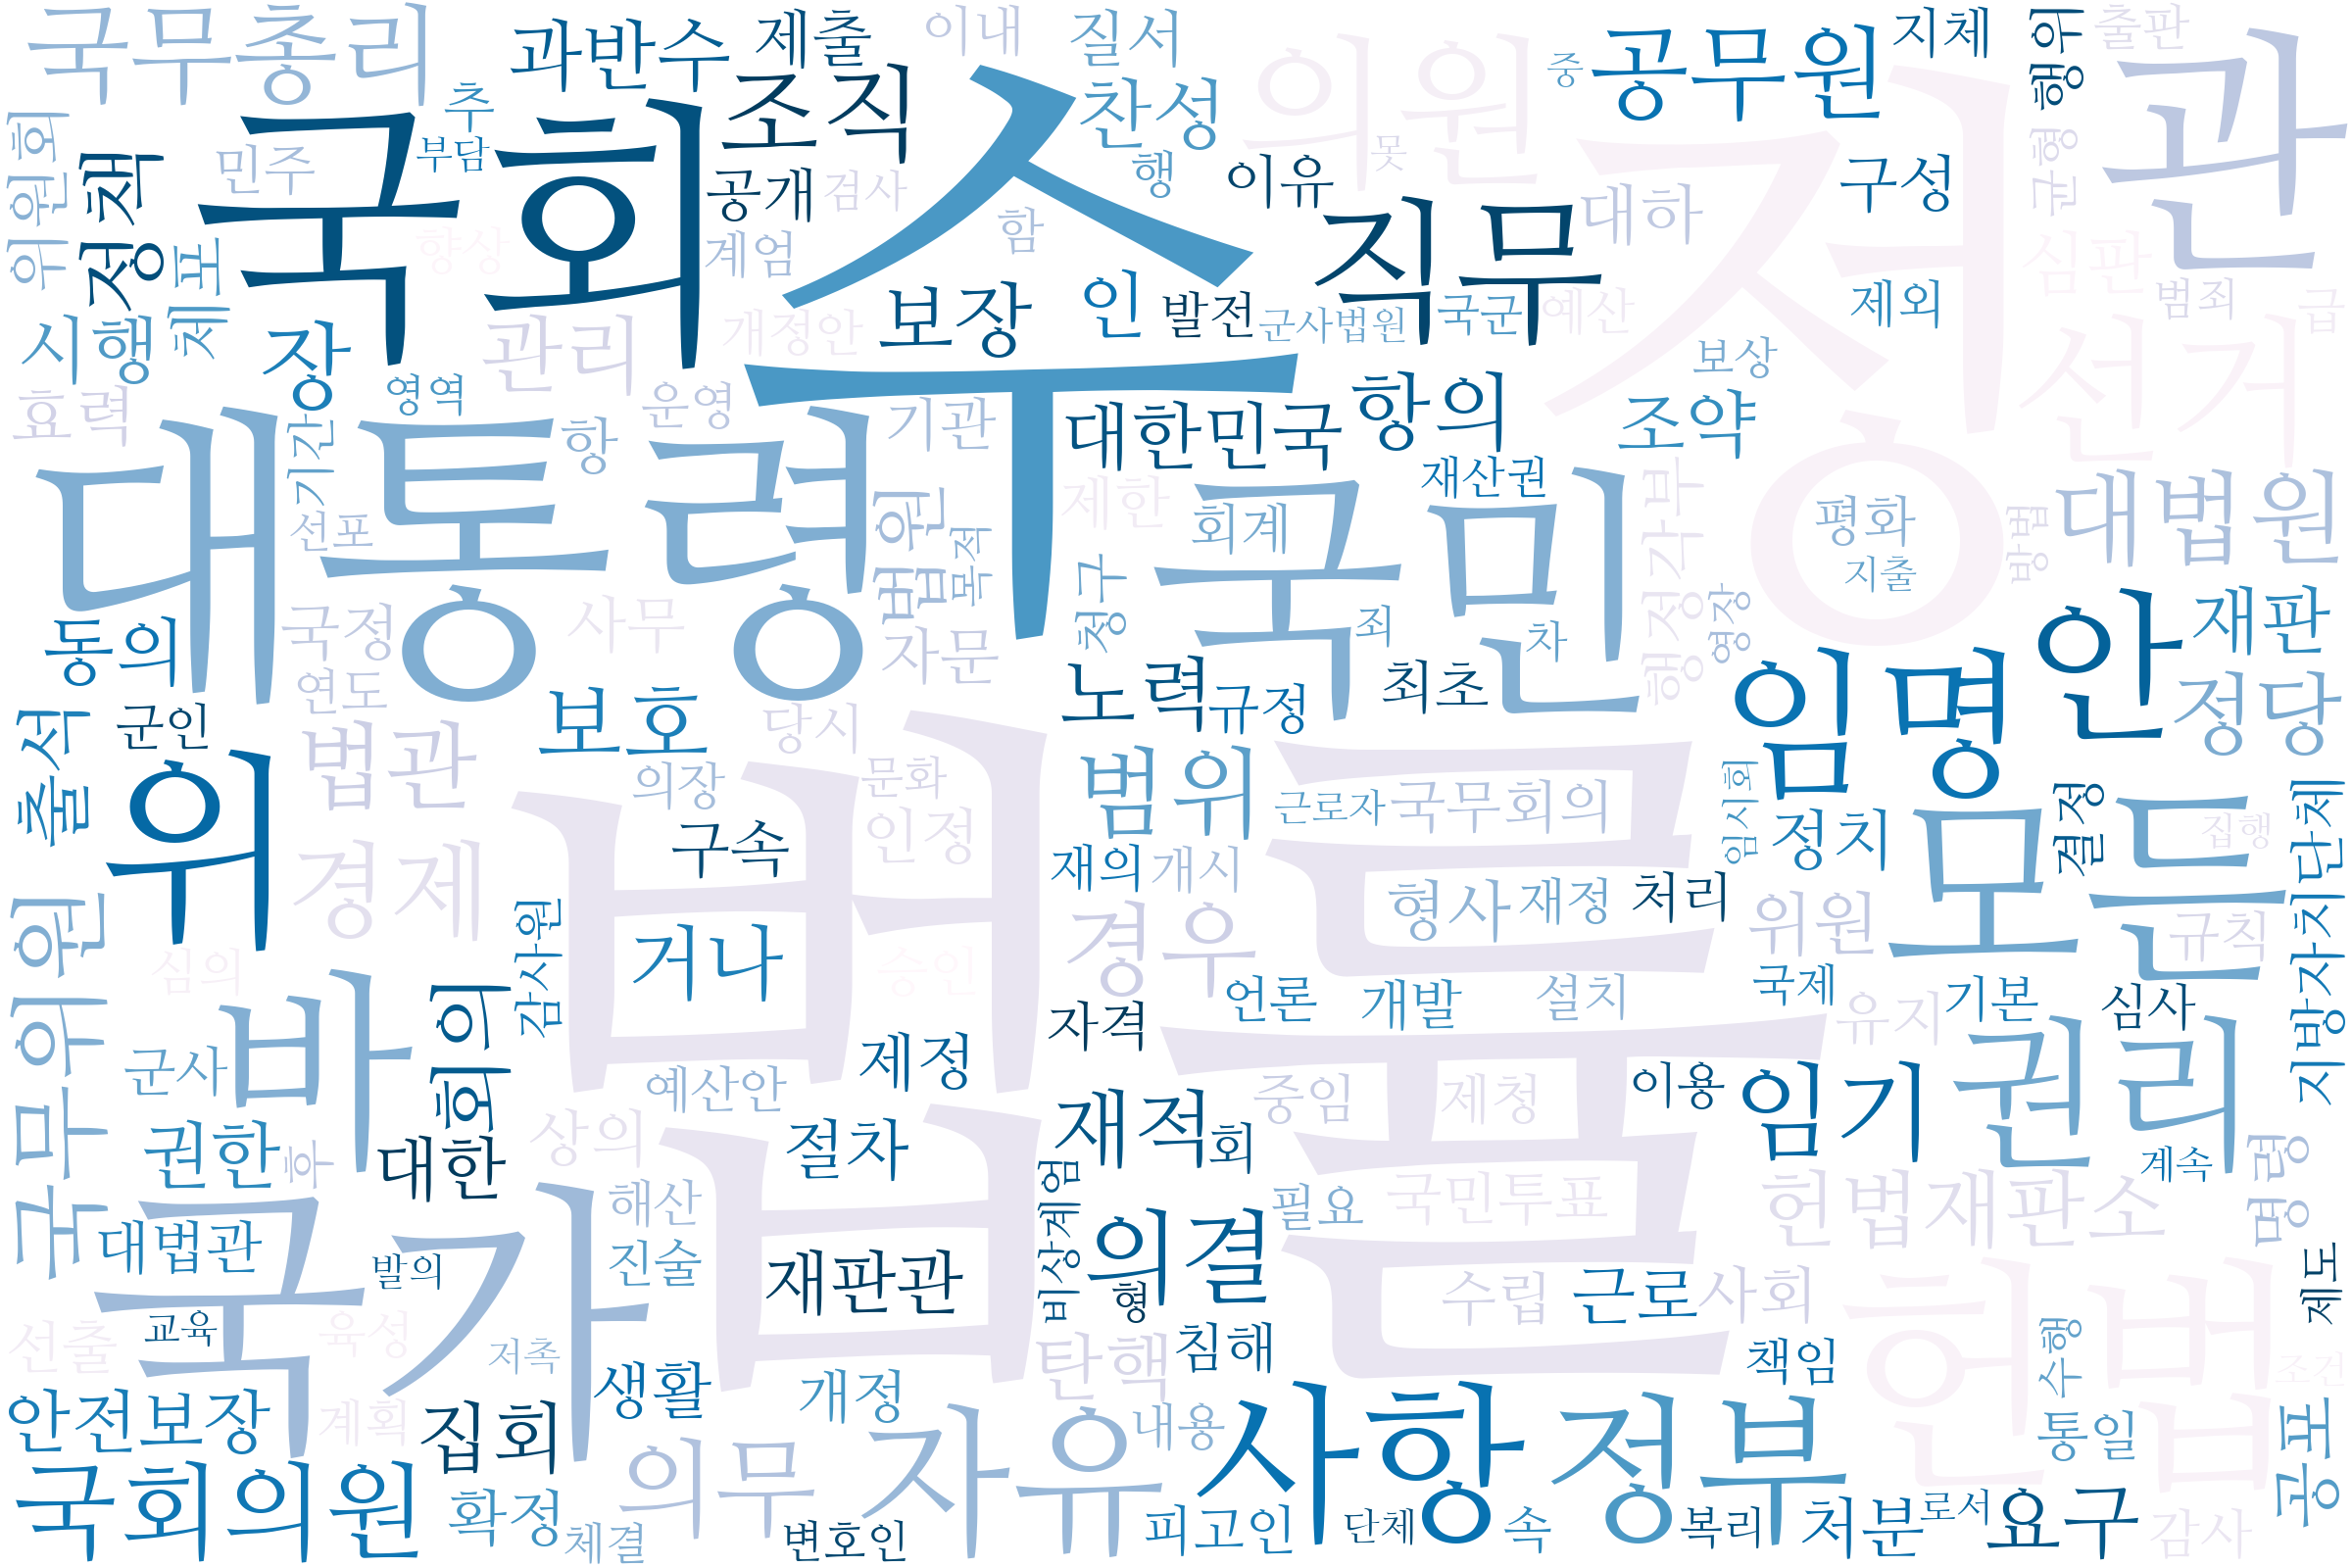

In [16]:
# 워드 클라우드 객체 생성:
    # 한글은 폰트파일 경로 따로 지정해줘야 됨
wc = WordCloud(
    font_path = './wordcloud/NanumMyeongjo.ttf',
    width = 1200,
    height = 800,
    scale = 2.0,
    background_color = '#ffffff',
    colormap = 'PuBu'
)

# 직접 생성한 빈도수를 이용해서 워드 클라우드를 그리자:
wc = wc.generate_from_frequencies(count)
wc.to_file('대한민국헌법-주요단어.png')
Image(filename = '대한민국헌법-주요단어.png')